In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (2).csv


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [ ]:
sp = pd.read_csv("spam.csv", encoding="ISO-8859-1")

#First 5 entries 
sp.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Last 10 entries
sp.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
#Basic Information
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Description
sp.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
#Shape of tuple
sp.shape

(5572, 5)

In [ ]:
#Check null values
sp.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
#Check duplicate values
sp.duplicated().sum()

403

# **Cleaning**

In [ ]:
sp.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
sp

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#Deleting duplicate data
sp.drop_duplicates(keep = 'first', inplace = True)
sp.duplicated().sum()

0

In [ ]:
#Checking the size
sp.size 

10338

In [ ]:
#Rename the columns
sp.rename(columns = {'v1' : 'Target', 'v2':'Message'}, inplace = True)
sp

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Visualize the data**

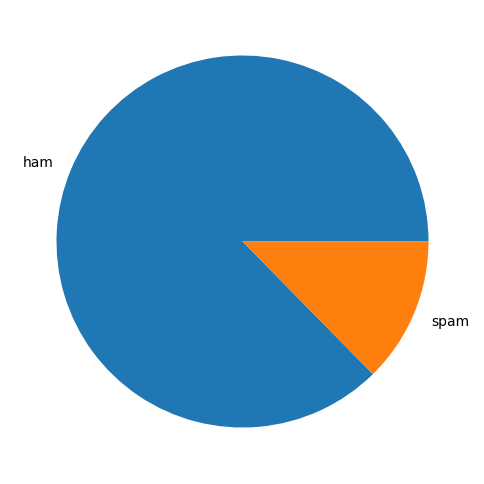

In [ ]:
pt.figure(figsize=(6,8))
pt.pie(sp['Target'].value_counts(), labels = ['ham', 'spam'])
pt.show()

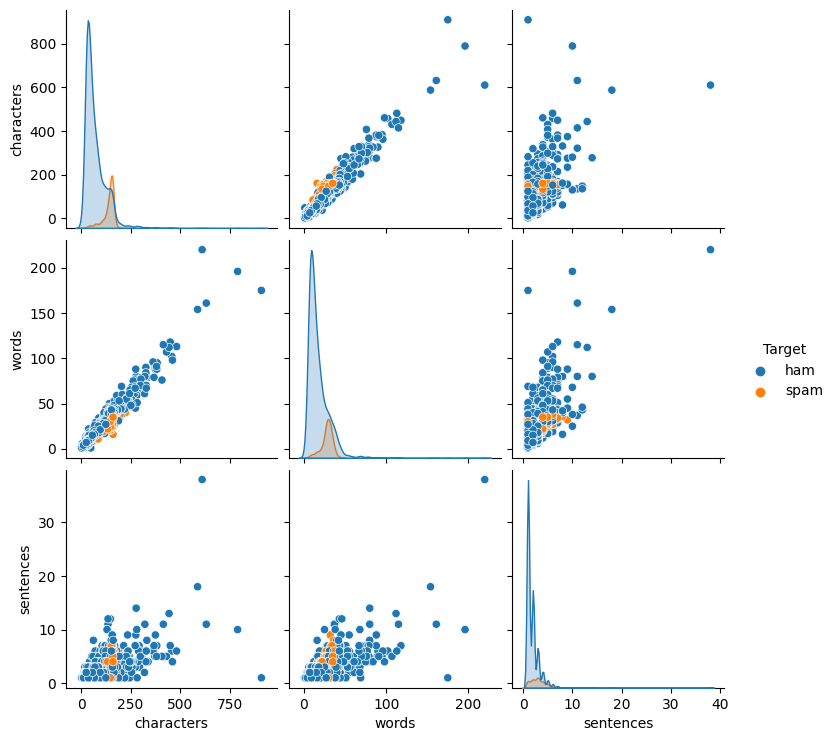

In [ ]:
sb.pairplot(sp,hue='Target')

**Number of words and characters in a sentence**

In [ ]:
sp['characters'] = sp['Message'].apply(len)

In [ ]:
sp['words'] = sp['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
sp['sentences'] = sp['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
sp.head()

,Target,Message,characters,words,sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='characters', ylabel='Count'>

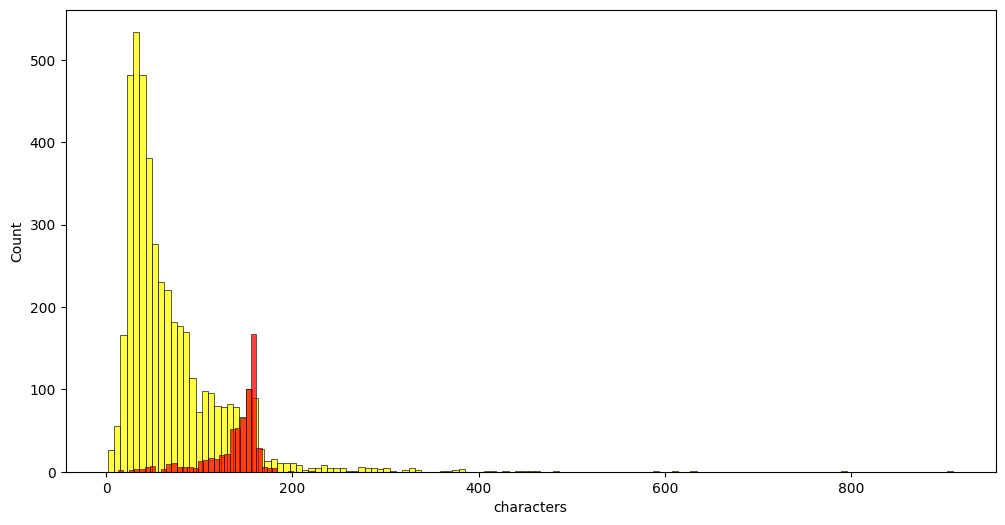

In [ ]:
#histogram for characters
pt.figure(figsize=(12,6))
#ham
sb.histplot(sp[sp['Target'] == 'ham']['characters'],color='yellow')
#spam
sb.histplot(sp[sp['Target'] == 'spam']['characters'],color='red')

<Axes: xlabel='words', ylabel='Count'>

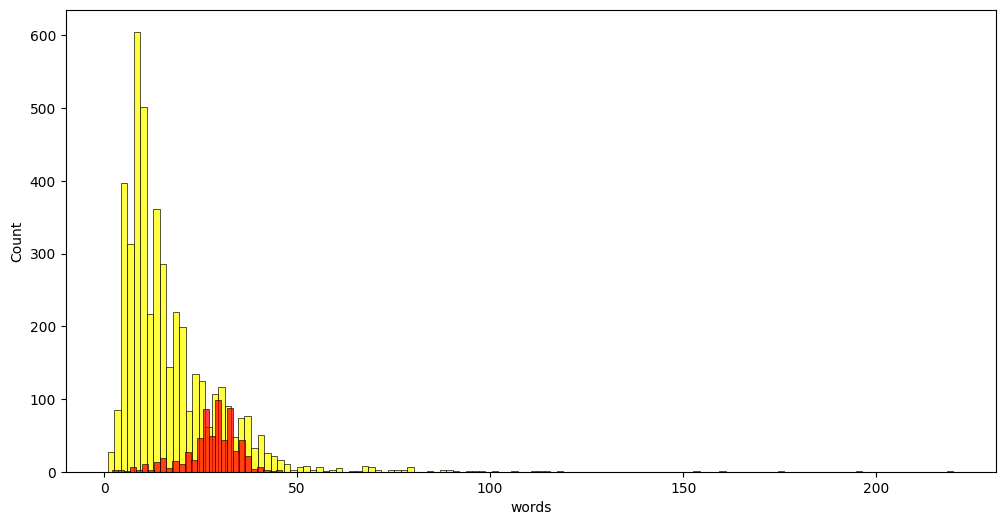

In [ ]:
#histogram for words
pt.figure(figsize=(12,6))
#ham
sb.histplot(sp[sp['Target'] == 'ham']['words'],color='yellow')
#spam
sb.histplot(sp[sp['Target'] == 'spam']['words'],color='red')

<ipython-input-41-d43478c0f683>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(sp.corr(),annot=True)


<Axes: >

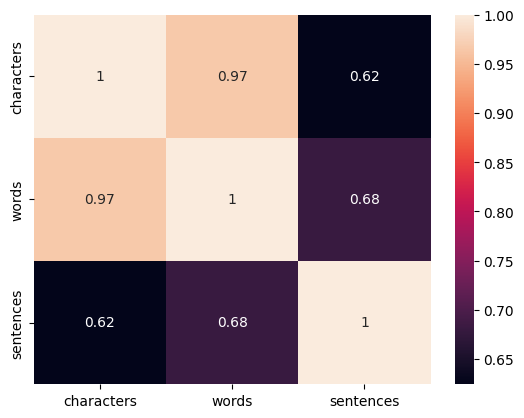

In [ ]:
# HeatMap
sb.heatmap(sp.corr(),annot=True)

**Data Modelling**

In [ ]:
m = sp['Message']
t= sp['Target']

In [ ]:
t

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Target, Length: 5169, dtype: object

In [ ]:
m

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [ ]:
def alter(text):
    
    #to make lowercase
    text = text.lower()
    
    #to tokenize
    text = nltk.word_tokenize(text)
    
    #removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(m,t, test_size = 0.2, random_state = 3)

**Logistic Regression**

In [ ]:
model_l = LogisticRegression()

In [ ]:
v = CountVectorizer()

In [ ]:
featureextraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True',max_features=3000)
xtrainfeatures = v.fit_transform(xtrain)
xtestfeatures = v.transform(xtest)

In [ ]:
model_l.fit(xtrainfeatures, ytrain)

LogisticRegression()

In [ ]:
predict= model_l.predict(xtrainfeatures)
acc= accuracy_score(ytrain, predict)

**Testing the model**

In [ ]:
mail = input("Enter the text of the email :\n\n")

Enter the text of the email :

a


In [ ]:
input1=alter(mail)
input1

'a'

In [ ]:
inp= v.transform([input1])

In [ ]:
prediction=model_l.predict(inp)

In [ ]:
if (prediction[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')
     

Non-Spam mail


**Checking the accuracy**

In [ ]:
accuracy= accuracy_score(ytrain, predict)*100
accuracy

99.75816203143893